# Get Loss

In [1]:
import os
import matplotlib.pyplot as plt

In [4]:
#OUT = '/home/max/mrcnn_b_work/OUT/'
OUT = '/home/maxsen/git/master_thesis/out/'
print(os.listdir(OUT))
out_file = 'nuclei_resized.out'

print(OUT + out_file)
lines_loss = [line for line in open(OUT + out_file) if line.startswith('2019-0') and line.split()[2] == 'maskrcnn_benchmark.trainer' and line.split()[4] == 'eta:']


['nuclei_test.error', 'nuclei_resized.out', 'nuclei_resized.log', 'nuclei_resized', 'nuclei_resized.error', 'nuclei_nonorm', 'nuclei_test', 'nuclei_test.log', 'nuclei_test.out']
/home/maxsen/git/master_thesis/out/nuclei_resized.out


### one line
2019-02-21 15:32:52,678 maskrcnn_benchmark.trainer INFO: eta: 22:59:49  iter: 384020  loss: 0.0335 (0.1234)  loss_classifier: 0.0055 (0.0265)  loss_box_reg: 0.0033 (0.0149)  loss_mask: 0.0254 (0.0720)  loss_objectness: 0.0000 (0.0073)  loss_rpn_box_reg: 0.0003 (0.0027)  time: 0.2530 (0.2464)  data: 0.0052 (0.0066)  lr: 0.002500  max mem: 2280

In [5]:
losses = []
iterations = []
eta = []
indexes = []
lr = []
loss_classifier = []
loss_box_reg = []
loss_mask = []
loss_objectness = []
loss_rpn_box_reg = []

days_to_hours = {}
for i in range(11):
    days_to_hours[i] = i * 24
    
for i, one_line in enumerate(lines_loss):
    elements = one_line.split()
    indexes.append(i)
    if len(elements) == 39:
        
        losses.append(float(elements[11]))
        iterations.append(int(elements[9]))
        lr.append(float(elements[35]))
        time = days_to_hours[int(elements[5])] + int(elements[7].split(':')[0])
        eta.append(time)
        loss_classifier.append(float(elements[14]))
        loss_box_reg.append(float(17))
        loss_mask.append(float(20))
        loss_objectness.append(float(23))
        loss_rpn_box_reg.append(float(26))
        
    elif len(elements) == 37:
        
        losses.append(float(elements[9]))
        iterations.append(int(elements[7]))
        lr.append(float(elements[33]))
        time = int(elements[5].split(':')[0])
        eta.append(time)
        loss_classifier.append(float(elements[12]))
        loss_box_reg.append(float(15))
        loss_mask.append(float(18))
        loss_objectness.append(float(21))
        loss_rpn_box_reg.append(float(24))
        
norm_time = [(max(eta) - i) for i in eta]
norm_iterations = [i / 100000 for i in iterations]

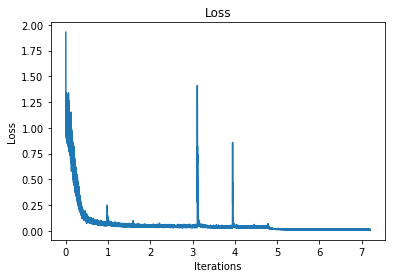

In [6]:
plt.figure()

plt.plot(norm_iterations, losses)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.xlim()
plt.ylim()
plt.title("Loss")
plt.show()

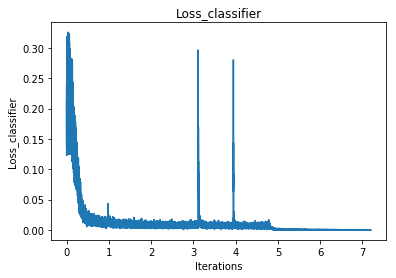

In [7]:
plt.figure()

plt.plot(norm_iterations, loss_classifier)
plt.ylabel('Loss_classifier')
plt.title('Loss_classifier')
plt.xlim()
plt.xlabel('Iterations')
plt.show()

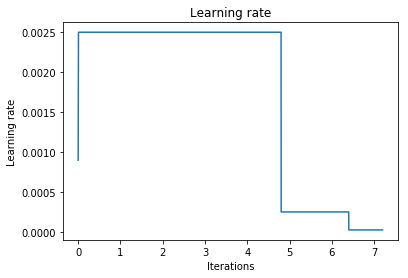

In [8]:
plt.figure()

plt.plot(norm_iterations, lr)

plt.ylabel('Learning rate')
plt.xlabel('Iterations')
plt.title("Learning rate")
plt.show()

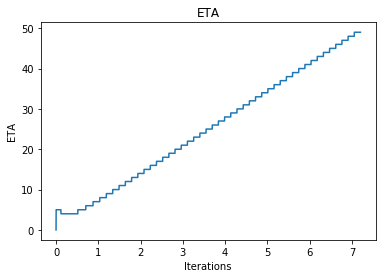

In [9]:
plt.figure()

plt.plot(norm_iterations, norm_time)
plt.ylabel('ETA')
plt.xlabel('Iterations')
plt.title("ETA")
plt.show()

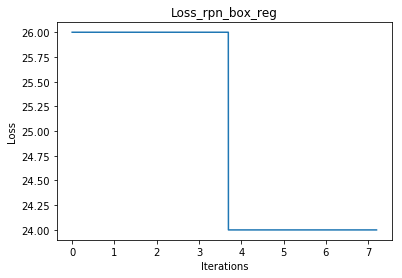

In [10]:
plt.figure()

plt.plot(norm_iterations, loss_rpn_box_reg)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title("Loss_rpn_box_reg")
plt.show()

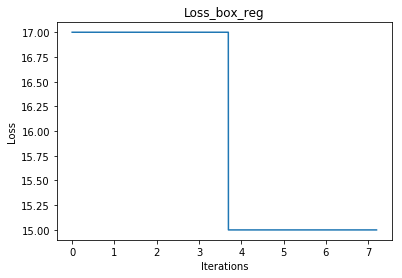

In [11]:
plt.figure()

plt.plot(norm_iterations, loss_box_reg)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Loss_box_reg')
plt.show()

In [ ]:
# cp file
models = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190306_coco_complete_popped/'
print(os.listdir(models))